# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [25]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik
bill,all right thank you thank you very much thank...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan
john,armed with boyish charm and a sharp wit the fo...,John Mulaney
louis,introfade the music out lets roll hold there l...,Louis C.K.


In [26]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.067868,0.478434
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.048225,0.562653
bill,all right thank you thank you very much thank...,Bill Burr,0.008194,0.543606
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.074740,0.552038
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.002739,0.515717
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.080367,0.463158
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.039077,0.537468
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.075127,0.536967
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.075205,0.489270
louis,introfade the music out lets roll hold there l...,Louis C.K.,0.052783,0.522390


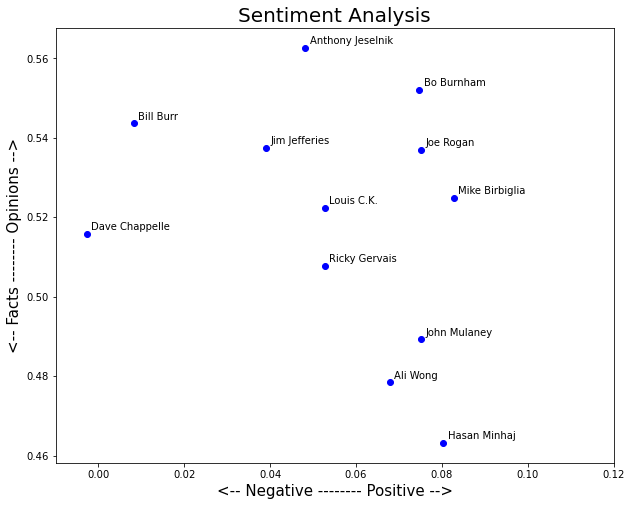

In [27]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [28]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [29]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.067868,0.478434
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.048225,0.562653
bill,all right thank you thank you very much thank...,Bill Burr,0.008194,0.543606
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.074740,0.552038
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.002739,0.515717
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.080367,0.463158
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.039077,0.537468
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.075127,0.536967
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.075205,0.489270
louis,introfade the music out lets roll hold there l...,Louis C.K.,0.052783,0.522390


In [30]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take 

In [31]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [32]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [33]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10653174603174606,
  0.058922508818342156,
  0.08211528550814265,
  0.0960540239487608,
  -0.03232664995822891,
  0.11699678187773427,
  0.04340054682159946,
  0.1109394078144078,
  0.026169511829889188,
  0.07644198524480213],
 [0.1305374311097203,
  -0.0799407114624506,
  -0.018946837994457046,
  0.008620931537598207,
  0.15635493254540875,
  0.09163600288600286,
  0.06670212765957446,
  -0.03509881730469966,
  0.05046253349824779,
  0.08822959919898694],
 [-0.027817143174286022,
  -0.007264331047516883,
  0.017760031775183288,
  0.0038918706010542667,
  -0.050561668270001595,
  0.06649181547619049,
  0.023315206373057597,
  -0.023031267104542976,
  -0.016144461330631563,
  0.09410303160303166],
 [0.18330572808833684,
  -0.01340245775729646,
  -0.04257631257631257,
  0.08127541650268921,
  0.030139573070607547,
  0.04981337181337181,
  -0.016802832244008727,
  0.0025327505827505803,
  0.209983247346261,
  0.23821653189577713],
 [-0.05073496534764142,
  -0.07116775866775868,
  0.0

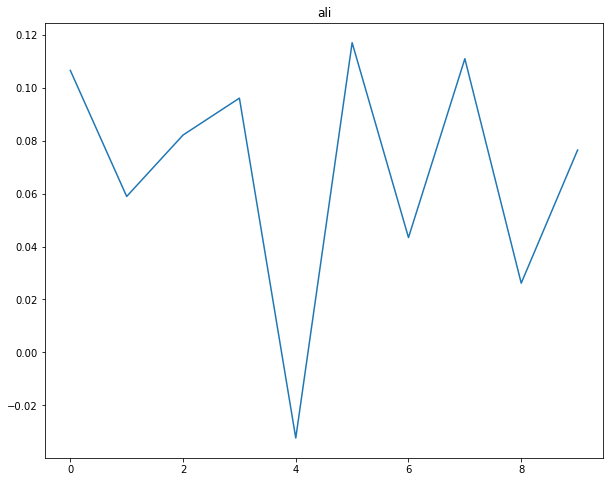

In [34]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

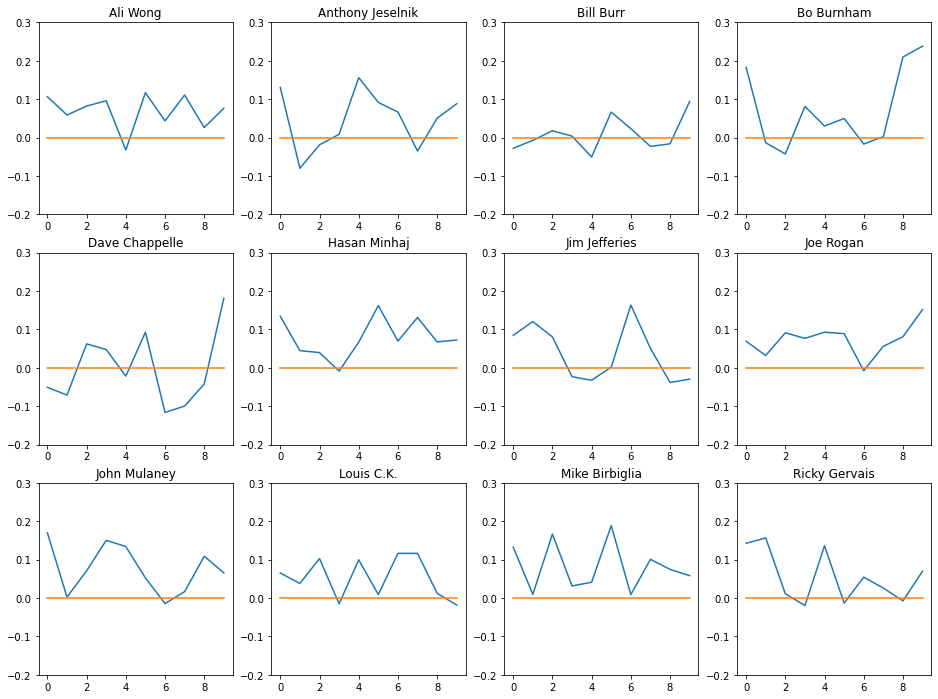

In [35]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.
On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional
Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [43]:
# Split each routine into 20 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [44]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.067868,0.478434
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.048225,0.562653
bill,all right thank you thank you very much thank...,Bill Burr,0.008194,0.543606
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.074740,0.552038
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.002739,0.515717
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.080367,0.463158
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.039077,0.537468
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.075127,0.536967
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.075205,0.489270
louis,introfade the music out lets roll hold there l...,Louis C.K.,0.052783,0.522390


In [45]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take 

In [46]:
# The list has 20 elements, one for each transcript
len(list_pieces)

12

In [47]:
# Each transcript has been split into 20 pieces of text
len(list_pieces[0])


20

In [48]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.1784704184704185,
  0.018606701940035247,
  0.08186507936507938,
  0.03950956450956451,
  0.08410493827160494,
  0.08000859434682965,
  0.04197824808935918,
  0.12795698924731183,
  -0.015579710144927544,
  -0.04365546218487395,
  0.06806958473625141,
  0.18223304473304472,
  0.05133838383838384,
  0.037308718413369586,
  0.09606848912404467,
  0.127,
  0.017413286302175188,
  0.03526251526251527,
  -0.003007518796992481,
  0.16792929292929287],
 [0.2536750783092247,
  0.01033163265306123,
  0.013696488696488696,
  -0.1401360544217687,
  -0.11052170868347337,
  0.08841680350301041,
  0.07697368421052635,
  -0.029322638146167573,
  0.1452861952861953,
  0.1664174209628755,
  0.04033613445378148,
  0.14614211309523809,
  -0.017045454545454544,
  0.1404,
  -8.571428571429119e-05,
  -0.06876526251526252,
  -0.11377314814814816,
  0.17363929473304474,
  -0.007161616161616169,
  0.18759544853294852],
 [0.015788354671333407,
  -0.07439574314574314,
  -0.005747955747955741,
  -0.0158091003

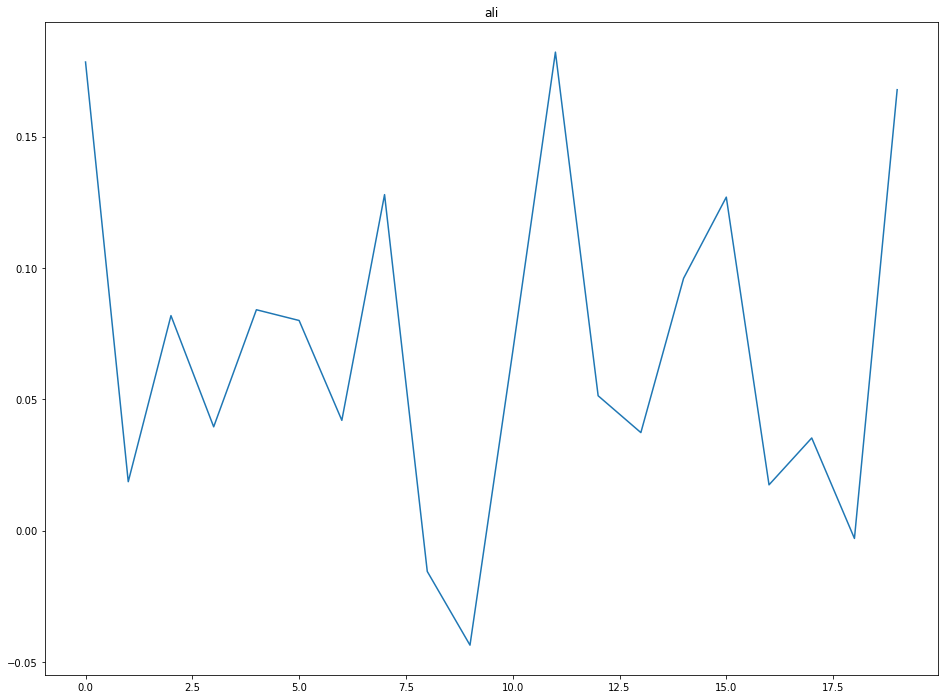

In [49]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

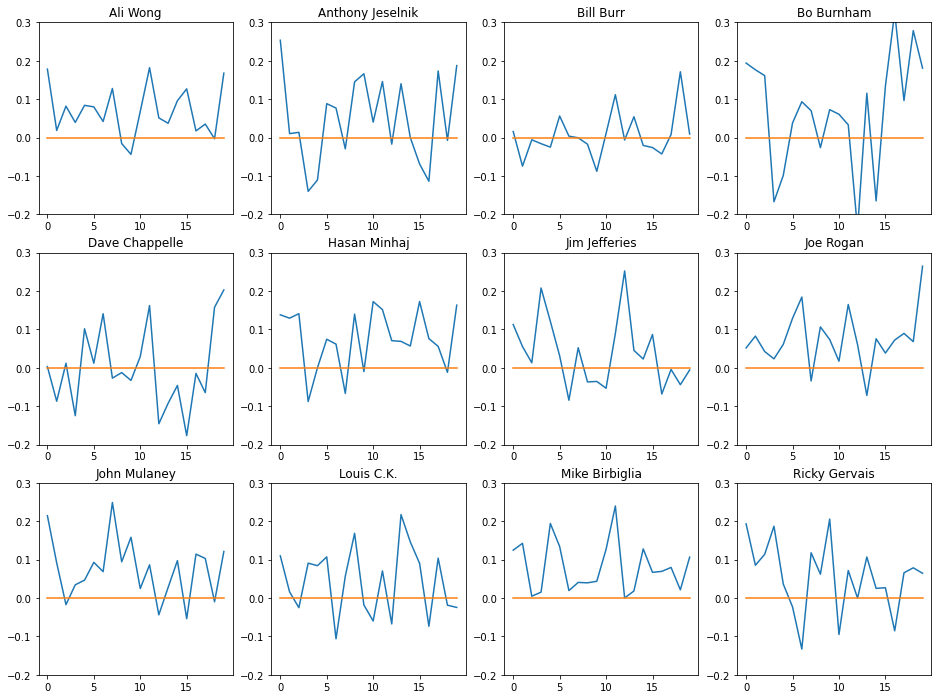

In [50]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()